# Problem Set #2 - 20150127

In [92]:
import sys
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


**1. Write a program that displays $m$ iterates of the logistic equation on the axes $x_n$ versus $R$ (a “bifurcation plot”), but add an argument $l$ that allows the user to suppress the plotting of the first $l$ points (the transient). Turn in a bifurcation plot for the range $2.8 < R < 4$. Pick $l$, $m$, and the interval between $R$ values such that the details of the behavior are visible, but not such that the plot requires exorbitant amounts of CPU time.**

We start by defining some globals. We define the "height" of the algorithm to be how many steps remain after we throw away the transient. We define the precision to be the interval between $R$ values, however it's used elsewhere too. We also define the number of values in our $R$ array based off of the precision.

In [75]:
height = 500
precision = 2000
numvals = int(precision * (4 - 2.8) + 1)

We now extend our function from last time to allow for removing the transient.

In [55]:
def r_func(m, init, r, toss=0):
    '''
    Array-oriented method
    '''
    vals = np.zeros(m)
    vals[0] = init
    for i in range(1, m):
        vals[i] = r * vals[i - 1] * (1 - vals[i - 1])
    return vals[toss:]

We establish our $R$ values, pre-allocate memory for our data, and finally run the algorithm to generate our data.

In [64]:
r_vals = np.arange(2.8, 4, 1 / precision)
data = np.zeros((numvals, height))
i = 0
for r in r_vals:
    vals = r_func(1000, 0.2, r, height)
    data[i] = vals
    i += 1

Now that we have a populated array we iterate through and plot the points.

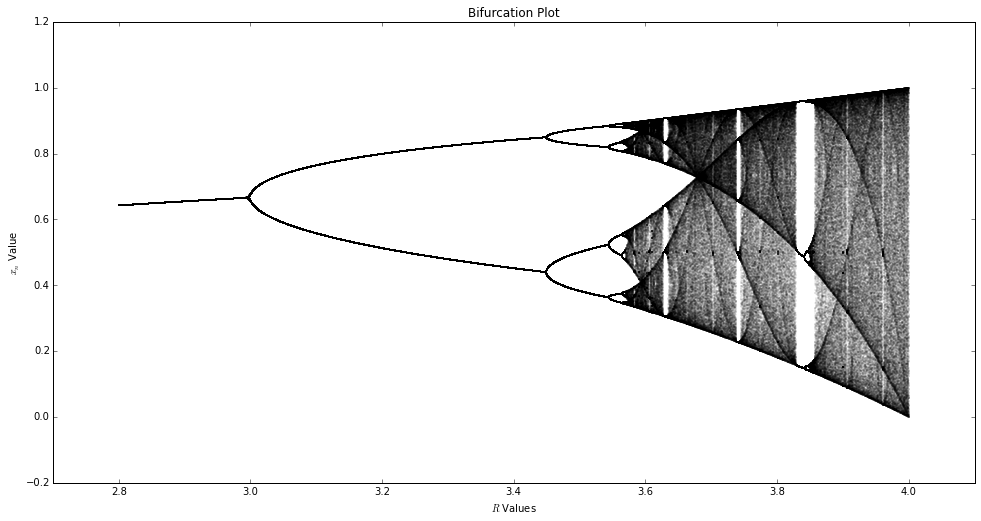

In [80]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
for i in range(numvals):
    ax.scatter(np.zeros(height) + r_vals[i], data[i], s=0.1, alpha=0.2)
plt.title('Bifurcation Plot')
plt.xlabel(r'$R$ Values')
plt.ylabel(r'$x_n$ Value')
plt.xlim(2.7, 4.1)
plt.show()

**2. Expand the first period-doubling cascade on your plot from problem 1, zeroing in on the bifurcation points, and estimate the Feigenbaum number experimentally. (You can get much better resolution on this by looking at the numbers in the iteration sequence than by looking at the graph, by the way, and you’ll need that resolution when you get into the smaller-width bifurcations.) Use at least the first four bifurcations to compute your estimates and remember that these estimates will get closer to the true $4.66\ldots$ value as you get deeper into the bifurcation tree.**

We start by identifying bounds for each bifurcation point and calculating the data for those bounds.

In [188]:
bifur_points = [np.arange(2.95, 3.05, 1e-4),
                np.arange(3.44, 3.45, 1e-5),
                np.arange(3.52, 3.56, 1e-5),
                np.arange(3.56, 3.57, 1e-5)]

data = [np.zeros((bifur_points[0].shape[0], height)),
        np.zeros((bifur_points[1].shape[0], height)),
        np.zeros((bifur_points[2].shape[0], height)),
        np.zeros((bifur_points[3].shape[0], height))]

for i in range(4):
    for j in range(len(bifur_points[i])):
        vals = r_func(1000, 0.2, bifur_points[i][j], height)
        data[i][j] = vals

We now plot all the points.

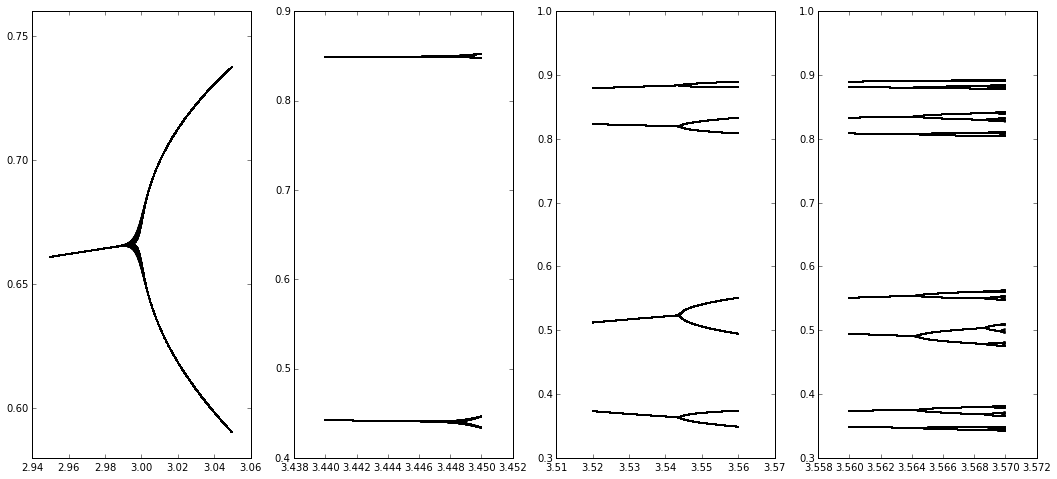

In [189]:
fig, axarr = plt.subplots(1, 4, figsize=(18,8))
for i in range(4):
    for j in range(bifur_points[i].shape[0]):
        axarr[i].scatter(np.zeros(height) + bifur_points[i][j], data[i][j], s=0.1, alpha=0.2)
plt.show()

We can now estimate the $R$ values to be $\{3, 3.449, 3.545, 3.5643\}$, using which we can approximate the Feigenbaum number.

In [157]:
(3.545 - 3.449) / (3.5643 - 3.545)

4.974093264248742

**3. Repeat problem 2 with the Henon map:**

$$
\begin{aligned}
x_{k + 1} &=& y_k + 1 - ax^2_k\\
y_{k + 1} &=& bx_k
\end{aligned}
$$

**Use $b = 0.3$ and $0 < a < 1.4$. See page 208 of Parker and Chua if you’re interested in learning more about this map. Please also turn in a plot of the bifurcation diagram of this map.**

Let's first establish our map.

In [190]:
def henon(a, b, x0, y0, steps, toss=0):
    xvals = np.zeros(steps)
    yvals = np.zeros(steps)
    xvals[0] = x0
    yvals[0] = y0
    for i in range(1, steps):
        yvals[i] = b * xvals[i - 1]
        xvals[i] = yvals[i - 1] + 1 - (a * xvals[i - 1]**2)
    return (xvals[toss:], yvals[toss:])

Now we can show our bifurcation diagram. We will only examine the $x$ coordinates. First we establish our data.

In [191]:
a  = np.arange(0, 1.4, 1e-3)
b  = 0.3
x0 = 0.2
y0 = 0.2

data = np.zeros((1.4 * 1e3 + 1, 500))

for i in range(a.shape[0]):
    data[i] = henon(a[i], b, x0, y0, 1000, 500)[0]

Now we can plot it.

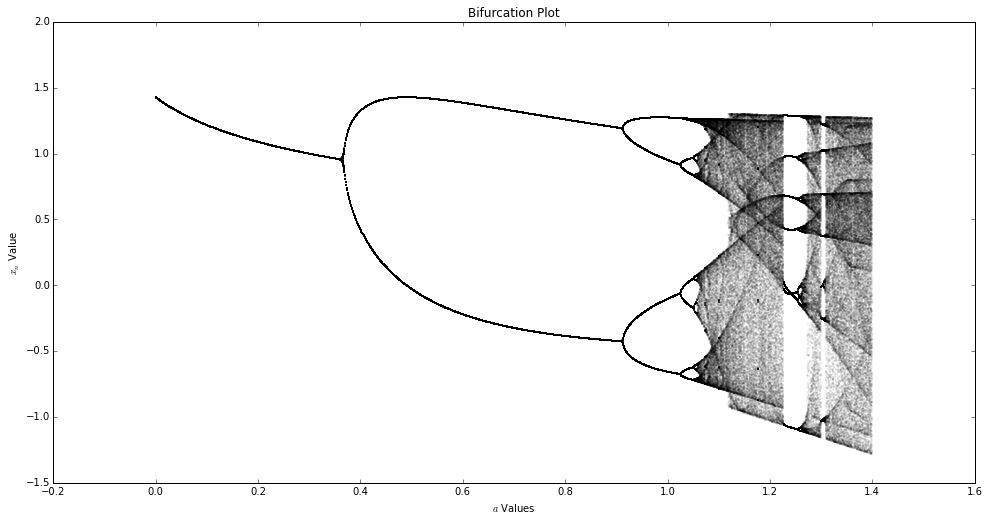

In [182]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
for i in range(int(1.4 * 1e3)):
    ax.scatter(np.ones(500) * a[i], data[i], s=0.1, alpha=0.2)
plt.title('Bifurcation Plot')
plt.xlabel(r'$a$ Values')
plt.ylabel(r'$x_n$ Value')
plt.show()

Now let us determine the bifurcation points and estimate the Feigenbaum number again.

In [217]:
bifur_points = [np.arange(0.35, 0.4, 1e-4),
                np.arange(0.9, 0.95, 1e-4),
                np.arange(1.0, 1.05, 1e-4),
                np.arange(1.05, 1.054, 1e-5)]

data = [np.zeros((bifur_points[0].shape[0], 500)),
        np.zeros((bifur_points[1].shape[0], 500)),
        np.zeros((bifur_points[2].shape[0], 500)),
        np.zeros((bifur_points[3].shape[0], 500))]

for i in range(4):
    for j in range(len(bifur_points[i])):
        vals = henon(bifur_points[i][j], b, x0, y0, 1000, 500)[0]
        data[i][j] = vals

And now we plot.

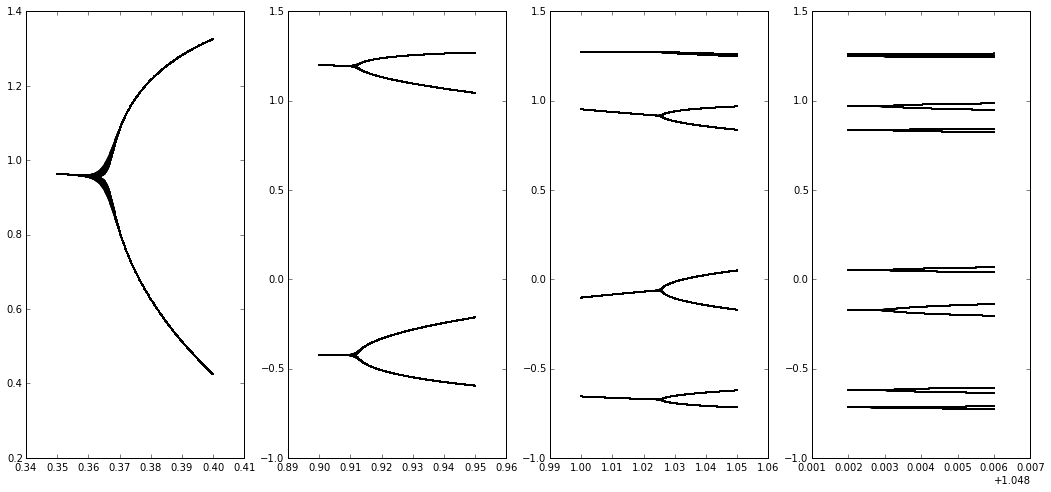

In [218]:
fig, axarr = plt.subplots(1, 4, figsize=(18,8))
for i in range(4):
    for j in range(bifur_points[i].shape[0]):
        axarr[i].scatter(np.ones(500) * bifur_points[i][j], data[i][j], s=0.1, alpha=0.2)
plt.show()

Estimating our bifurcation points we get $R = \{0.35, 0.912, 1.025, 1.051\}$.

In [219]:
(1.025 - 0.912) / (1.051 - 1.025)

4.346153846153838

**4. Are your answers to problems 2 and 3 the same (or close)? Should they be the same?**

These numbers are close, however they are still only approximations. In the ideal world, if were were to take the limit we would see the following behavior.

$$
\delta = \lim_{n\rightarrow \infty} \dfrac{a_{n-1}-a_{n-2}}{a_n-a_{n-1}} = 4.669\,201\,609\,\cdots
$$